In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

In [106]:
# lookup dict
noise_to_sigma = {
    'low': 1,
    'medium': 5,
    'high': 10,
    'vhigh': 100
}
inject_x_linear = {'low': 1/5, 'medium': 5/5, 'high': 10/5}
inject_x_image = {'low': 1/np.sqrt(32), 'medium': 5/np.sqrt(32), 'high': 10/np.sqrt(32)}
noise = 'high'

In [48]:
data = DataPreparation()

linear_homoskedastic simulation data generated,                 with noise injected type: feature.
linear_homoskedastic simulation data generated,                 with noise injected type: predictive.


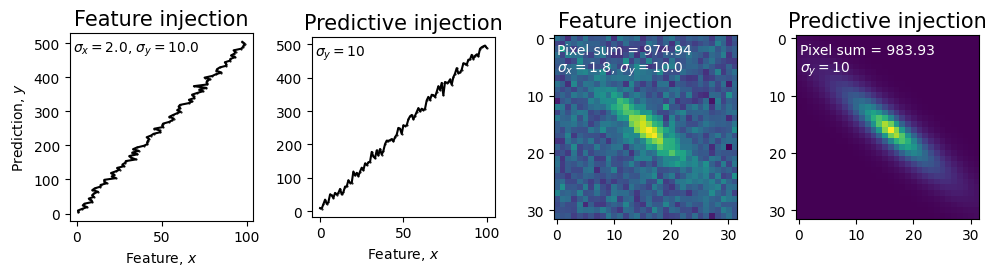

In [118]:
fig = plt.figure(figsize=(10,4))

data.params = np.array([[ 5, 4]])
ax0 = fig.add_subplot(141)
data.simulate_data(data.params,
                   inject_x_linear[noise], 
                   simulation_name = 'linear_homoskedastic',
                   inject_type = 'feature'
                   )
ax0.plot(np.array(data.input).flatten(), np.array(data.output).flatten(), color = 'black')
ax0.scatter(np.array(data.input), np.array(data.output), color = 'black', s=0.25, zorder=-100)
ax0.set_title('Feature injection', size=15)
ax0.annotate(r'$\sigma_x = $'+str(inject_x_linear[noise])+
             ', $\sigma_y = $'+str(inject_x_linear[noise]*data.params[0][0]),
             xy=(0.02, 0.9),
             xycoords='axes fraction'
            )
ax0.set_xlabel(r'Feature, $x$')
ax0.set_ylabel(r'Prediction, $y$')
ax0.set_aspect(0.2, adjustable='box')

ax1 = fig.add_subplot(142)
data.simulate_data(data.params,
                   noise_to_sigma[noise], 
                   simulation_name = 'linear_homoskedastic',
                   inject_type = 'predictive'
                   )
ax1.plot(np.array(data.input), np.array(data.output).flatten(), color = 'black')
ax1.scatter(np.array(data.input), np.array(data.output), color = 'black', s=0.25, zorder=-100)
ax1.set_title('Predictive injection', size=15)
ax1.annotate(r'$\sigma_y = $'+str(noise_to_sigma[noise]),
             xy=(0.02, 0.9),
             xycoords='axes fraction'
            )
ax1.set_xlabel(r'Feature, $x$')
ax1.set_aspect(0.2, adjustable='box')

# now doing 2D
data.params = np.array([[ 4.37086107,  9.55642876,  0.69598183]])
image_size = 32

ax2 = fig.add_subplot(143)

image_f, y_f = data.simulate_data_2d(
    size_df,
    data.params,
    inject_type="feature",
    sigma=inject_x_image[noise]
    )
ax2.imshow(image_f[0])
ax2.annotate('Pixel sum = ' + str(round(y_f[0], 2)),
             xy=(0.02, 0.9),
             xycoords='axes fraction',
             color='white',
             size=10)
ax2.annotate(r'$\sigma_x = $' + str(round(inject_x_image[noise], 1)) 
             + ', $\sigma_y = $' + str(round(inject_x_image[noise]*np.sqrt(32), 2)),
             xy=(0.02, 0.8),
             xycoords='axes fraction',
             color='white',
             size=10)
ax2.set_title('Feature injection', size=15)

ax3 = fig.add_subplot(144)

image_p, y_p = data.simulate_data_2d(
    size_df,
    data.params,
    inject_type="predictive",
    sigma=noise_to_sigma[noise]
    )
ax3.imshow(image_p[0])
ax3.annotate('Pixel sum = ' + str(round(y_p[0], 2)),
             xy=(0.02, 0.9),
             xycoords='axes fraction',
             color='white',
             size=10)
ax3.annotate(r'$\sigma_y = $' + str(round(noise_to_sigma[noise])),
             xy=(0.02, 0.8),
             xycoords='axes fraction',
             color='white',
             size=10)
ax3.set_title('Predictive injection', size=15)



plt.tight_layout()
plt.savefig('../../../Desktop/design.png', dpi=1000)

In [ ]:
data = DataPreparation()